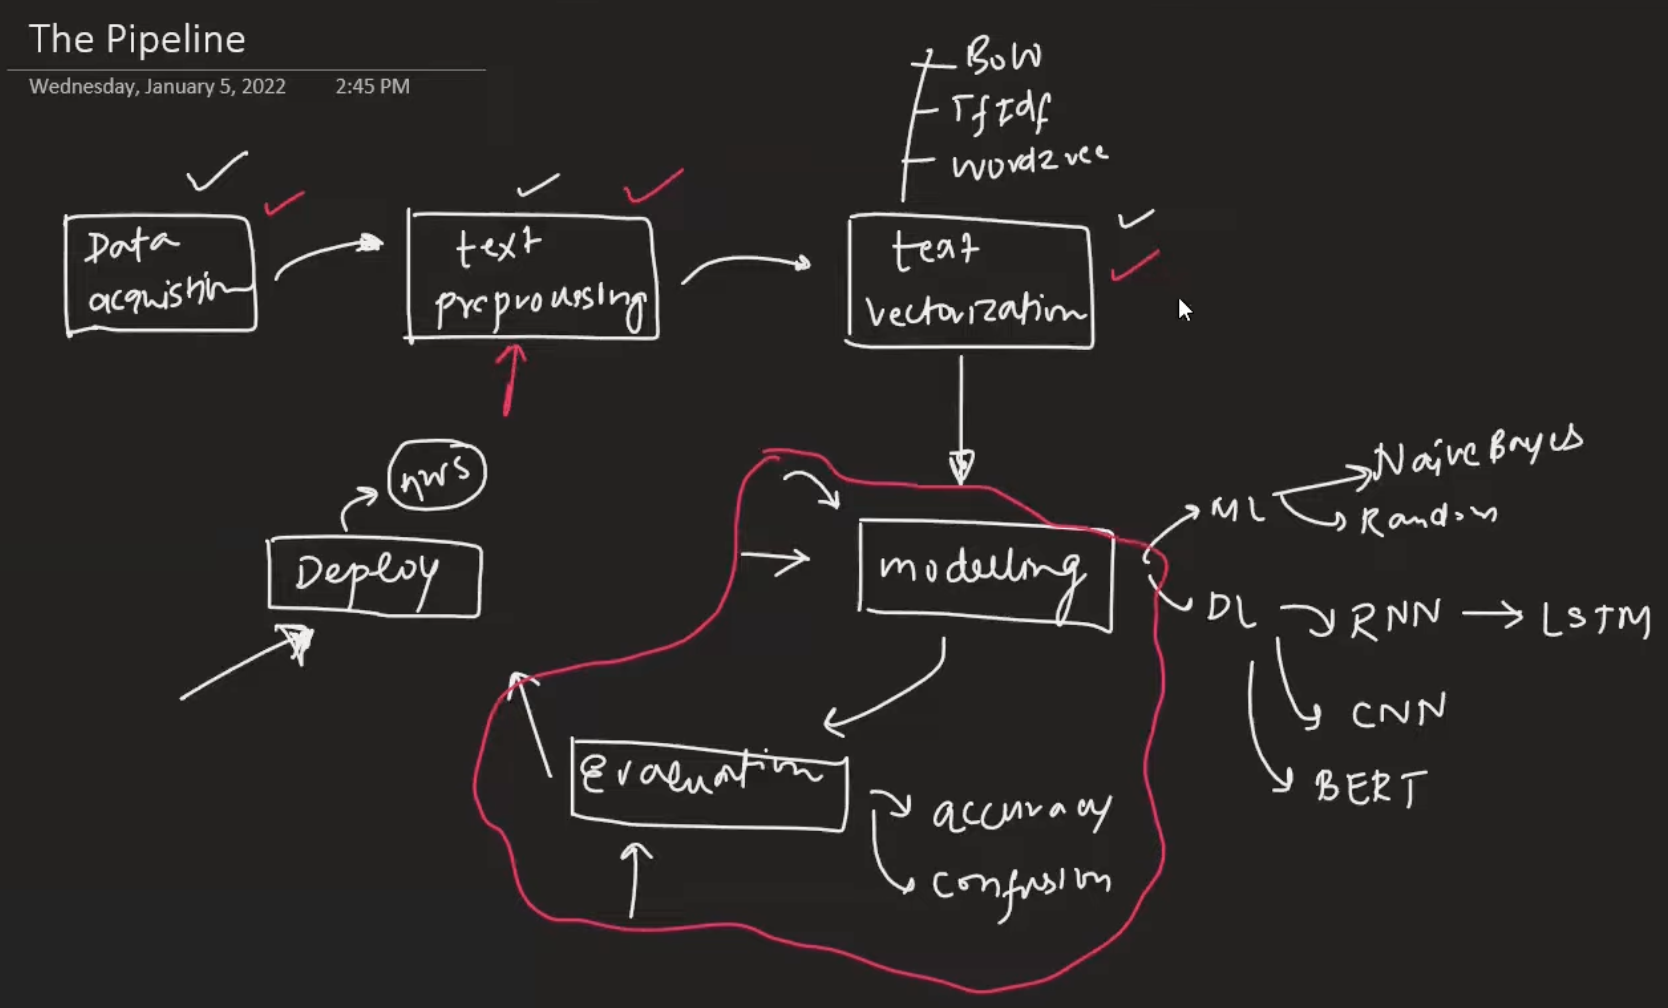

Use the following dataset - https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [1]:
import numpy as np
import pandas as pd

In [2]:
temp_df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df = temp_df.iloc[:10000]

In [4]:

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.drop_duplicates(inplace=True)

/var/folders/51/hk53j7p156z93xs5t0005lf40000gn/T/ipykernel_35734/3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


### Basic Preprocessing
* Remove tags
* lowercase
* remove stopwords

In [6]:
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text

In [7]:

df['review'] = df['review'].apply(remove_tags)

/var/folders/51/hk53j7p156z93xs5t0005lf40000gn/T/ipykernel_35734/3753165437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(remove_tags)


In [8]:
df['review'] = df['review'].apply(lambda x:x.lower())

/var/folders/51/hk53j7p156z93xs5t0005lf40000gn/T/ipykernel_35734/740760900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(lambda x:x.lower())


In [9]:
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

/var/folders/51/hk53j7p156z93xs5t0005lf40000gn/T/ipykernel_35734/2826946130.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))


In [10]:
df['review']

0       one reviewers mentioned watching 1 oz episode ...
1       wonderful little production. filming technique...
2       thought wonderful way spend time hot summer we...
3       basically there's family little boy (jake) thi...
4       petter mattei's "love time money" visually stu...
                              ...                        
9995    fun, entertaining movie wwii german spy (julie...
9996    give break. anyone say "good hockey movie"? kn...
9997    movie bad movie. watching endless series bad h...
9998    movie probably made entertain middle school, e...
9999    smashing film film-making. shows intense stran...
Name: review, Length: 9983, dtype: object

In [11]:
df['sentiment'].value_counts()

sentiment
positive    5023
negative    4960
Name: count, dtype: int64

In [12]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [16]:
X = df.iloc[:,0:1]
y = df['sentiment']

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [18]:
y

array([1, 1, 1, ..., 0, 0, 1])

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [20]:
X_train.shape

(7986, 1)

## Applying BoW

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
cv = CountVectorizer()

In [23]:
X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

In [24]:
X_train_bow.shape

(7986, 48282)

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()

gnb.fit(X_train_bow,y_train)
y_pred = gnb.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.6324486730095142

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8542814221331998

## Applying n-grams

In [30]:
cv = CountVectorizer(ngram_range=(1,3),max_features=5000)

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8407611417125689

## Applying TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
tfidf = TfidfVectorizer()

In [34]:
X_train_tfidf = tfidf.fit_transform(X_train['review']).toarray()
X_test_tfidf = tfidf.transform(X_test['review'])

In [35]:
rf = RandomForestClassifier()

rf.fit(X_train_tfidf,y_train)
y_pred = rf.predict(X_test_tfidf)

accuracy_score(y_test,y_pred)

0.8447671507260891

## Using Word2Vec

In [36]:
import gensim

In [37]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [ ]:
story = []
for doc in df['review']:
    raw_sent = sent_tokenize(doc)
    for sent in raw_sent:
        story.append(simple_preprocess(sent)) #Convert a document into a list of lowercase tokens, ignoring tokens that are too short or too long.

In [ ]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)
# by default dimension is 100.

In [40]:
model.build_vocab(story)

In [41]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(5850035, 6186875)

In [43]:
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in model.wv.index_to_key]
    return np.mean(model.wv[doc], axis=0)

# np.mean(model.wv[doc], axis=0) will give the mean of all the word vectors in the document.

In [ ]:
document_vector(df['review'].values[0])
# this is the first review into a vector of 100 dimensions.

array([-0.00776407,  0.33458376,  0.18781118,  0.01587329, -0.03159272,
       -0.4336791 ,  0.10711841,  0.7640944 , -0.18444045, -0.19757506,
       -0.27067262, -0.5579012 , -0.00760519,  0.28553367,  0.17778265,
       -0.25228396,  0.18840916, -0.5639289 , -0.05297944, -0.63914883,
        0.05575309,  0.10096668,  0.07875975, -0.2633165 , -0.18166214,
       -0.25306413, -0.15864967, -0.11216836, -0.38277075,  0.01605004,
        0.4382686 ,  0.08772259,  0.04514352, -0.15571603, -0.493858  ,
        0.32806474,  0.0212522 , -0.32193848, -0.18453822, -0.7677695 ,
        0.10350513, -0.18110645, -0.18883334,  0.01489038,  0.35542795,
       -0.16574429, -0.46058717, -0.14923115,  0.07824419,  0.29419798,
        0.11588854, -0.30885106, -0.37073836, -0.14279611, -0.3727237 ,
        0.10290931,  0.33339253,  0.16139625, -0.26512212,  0.087643  ,
       -0.01445607,  0.21637462, -0.17922421, -0.04762219, -0.3757304 ,
        0.47946602, -0.011887  ,  0.09194094, -0.5915274 ,  0.34

In [48]:
from tqdm import tqdm

In [49]:
X = []
for doc in tqdm(df['review'].values):
    X.append(document_vector(doc))

100%|██████████| 9983/9983 [03:05<00:00, 53.73it/s]


In [ ]:
X = np.array(X) # we need to convert the list into a numpy array.

In [51]:
X.shape

(9983, 100)

In [52]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y = encoder.fit_transform(df['sentiment'])

In [53]:
y

array([1, 1, 1, ..., 0, 0, 1])

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [56]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7741612418627942

### Practicle Advice 

* Use Ensemble techniques.
* Use Heurastic Approach in case if you have good knowledge of the dataset you are using.
* Don't directly move to DL approach, first use ML and try to solve it with that only then only move to DL.
* Don't use Imbalanced data {like Yes 80% and No 20%}